# Bank Fraud Detection

**Data Description:**

**label.test.csv** - the test set, contains customer’s basic attributes and payment histories. You need to predict whether these customers are credible or not.

**sample submission.csv** - a file showing the correct submission format. You must replace the NA’s with the predicted class labels. You should show your results by submitting the .csv file according to the format of this sample submission.csv.

**id**: A unique Id field which represents a customer

**X1**: Credit lineX2: Gender (1 = male; 2 = female).

**X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). X4: Marital status (1 = married; 2 = single; 3 = others).

**X5**: Age (year).

**X6 - X11**: History of past payment. X6 = September, 2015;

**X7** = August, 2015;

**X11** =April, 2015. -1 = pay one month ahead; -2 = pay two month ahead; 0 = pay on time; Positive means the payment delayed months, 1 = delay 1 month, 2 = delay 2 months, etc.X12- X17: Amount in bill statement.

**X12** = amount of bill statementSeptember, 2015

**X13** = amount of bill statementAugust, 2015

**X17** = amount of bill statementApril, 2015. 

**X18-X23**: Amount of previous payment

**X18** = amount paid in September, 2015; X19 = amount paid in August, 2015; X23 = amount paid in April, 2015.

**Y**: A binary response variable to indicate whether the customer is creditable (1) or not (0).

This is a real problem to classify multi-feature data into two groups.


# **1. Load the data**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
train = pd.read_csv('Desktop/DAL/train.csv', header=0)
test = pd.read_csv('Desktop/DAL/test.csv', header=0)
testGroundTruth = pd.read_csv('Desktop/DAL/testgroundtruth.csv', header=None)
print(train.shape)
print(test.shape)

(25000, 25)
(5000, 24)


In [14]:
train.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,200000,2,3,1,53,0,0,0,0,...,133207,136159,138741,6500,5000,5000,5100,5000,5400,0
1,2,130000,2,3,2,39,0,0,0,2,...,130814,130758,123468,7500,10000,0,4500,4500,4179,0
2,3,350000,2,1,2,41,0,0,0,0,...,119947,117328,118400,6000,5900,5800,4100,4500,5000,0
3,4,240000,2,2,1,43,1,-2,-2,-1,...,12700,12500,26225,0,0,12700,0,13725,0,0
4,5,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0


In [15]:
test.head()

,id,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,25001,180000,1,1,2,27,-1,0,0,0,...,6482,3246,2016,2334,12000,5004,1000,1000,2300,3000
1,25002,230000,2,3,1,52,-2,-2,-2,-2,...,2233,1410,0,0,3939,2244,1421,0,0,236
2,25003,150000,2,1,2,28,-1,-1,2,-1,...,1159,1159,11476,10249,2468,0,1159,11476,0,2034
3,25004,160000,1,1,1,40,0,0,2,2,...,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,25005,20000,2,2,2,26,0,0,0,0,...,8515,6584,3403,3748,2600,1500,1500,1000,402,0


In [16]:
testGroundTruth.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,25001,180000,1,1,2,27,-1,0,0,0,...,3246,2016,2334,12000,5004,1000,1000,2300,3000,0
1,25002,230000,2,3,1,52,-2,-2,-2,-2,...,1410,0,0,3939,2244,1421,0,0,236,0
2,25003,150000,2,1,2,28,-1,-1,2,-1,...,1159,11476,10249,2468,0,1159,11476,0,2034,0
3,25004,160000,1,1,1,40,0,0,2,2,...,-473,3757,3286,3000,0,0,4700,0,3000,1
4,25005,20000,2,2,2,26,0,0,0,0,...,6584,3403,3748,2600,1500,1500,1000,402,0,0


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
id     25000 non-null int64
X1     25000 non-null int64
X2     25000 non-null int64
X3     25000 non-null int64
X4     25000 non-null int64
X5     25000 non-null int64
X6     25000 non-null int64
X7     25000 non-null int64
X8     25000 non-null int64
X9     25000 non-null int64
X10    25000 non-null int64
X11    25000 non-null int64
X12    25000 non-null int64
X13    25000 non-null int64
X14    25000 non-null int64
X15    25000 non-null int64
X16    25000 non-null int64
X17    25000 non-null int64
X18    25000 non-null int64
X19    25000 non-null int64
X20    25000 non-null int64
X21    25000 non-null int64
X22    25000 non-null int64
X23    25000 non-null int64
Y      25000 non-null int64
dtypes: int64(25)
memory usage: 4.8 MB


In [18]:
train.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [19]:
test.isnull().sum()

id     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

# **2. Distinguish categorical and continuous variables**

In [20]:
cat_v = []
con_v = []
for c in train.columns:
    if len(train[c].value_counts().index)<=15:
        cat_v.append(c)
    else:
        con_v.append(c)
cat_v.remove('Y')
target = ['Y']

In [21]:
print("The continuous variables: ", con_v, "\n")
print("The categorical variables: ", cat_v)

The continuous variables:  ['id', 'X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'] 

The categorical variables:  ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


# **3. Basic feature analysis**

# i. Check the pattern differences between the training data and testing data

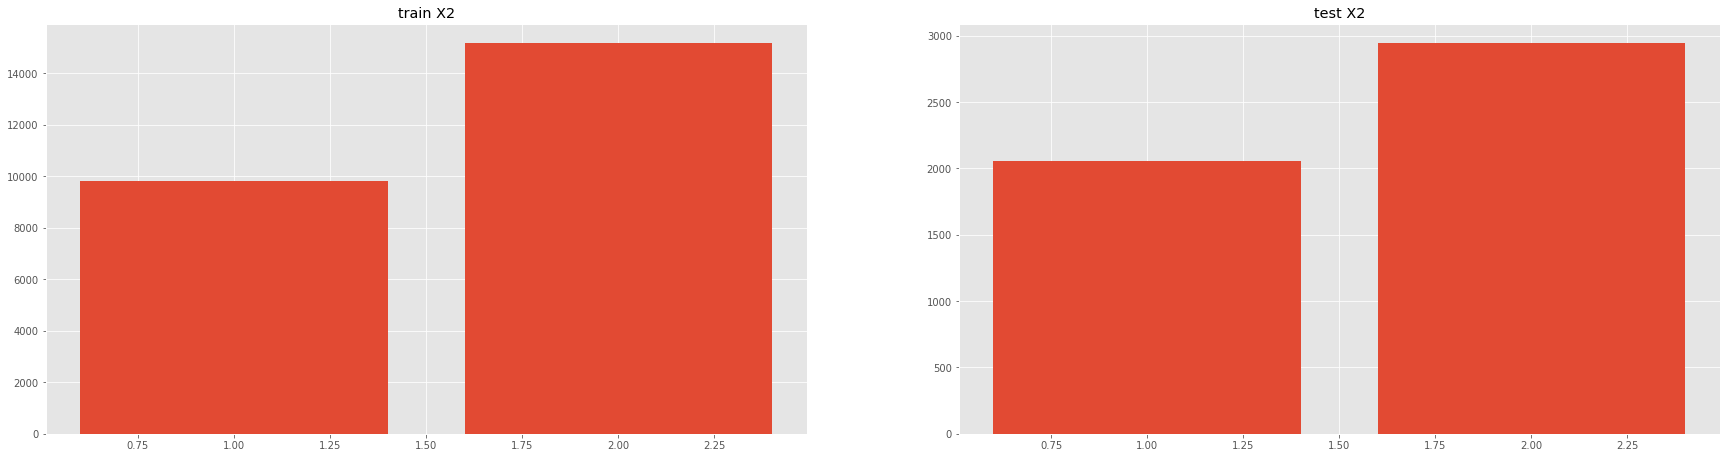

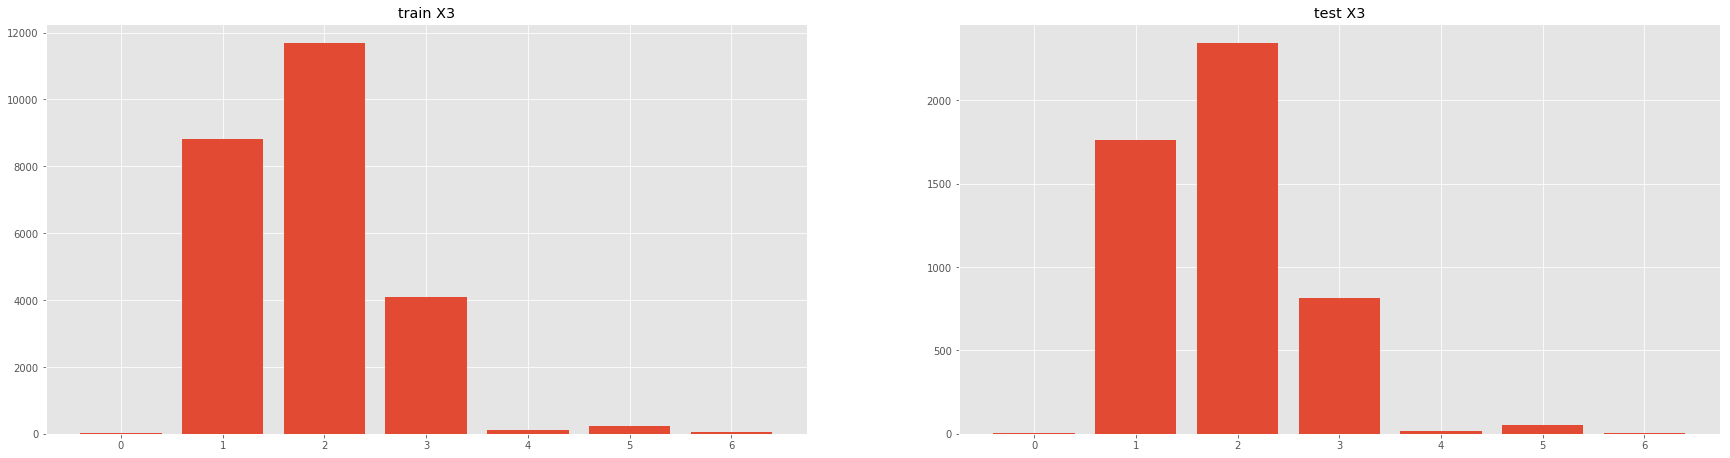

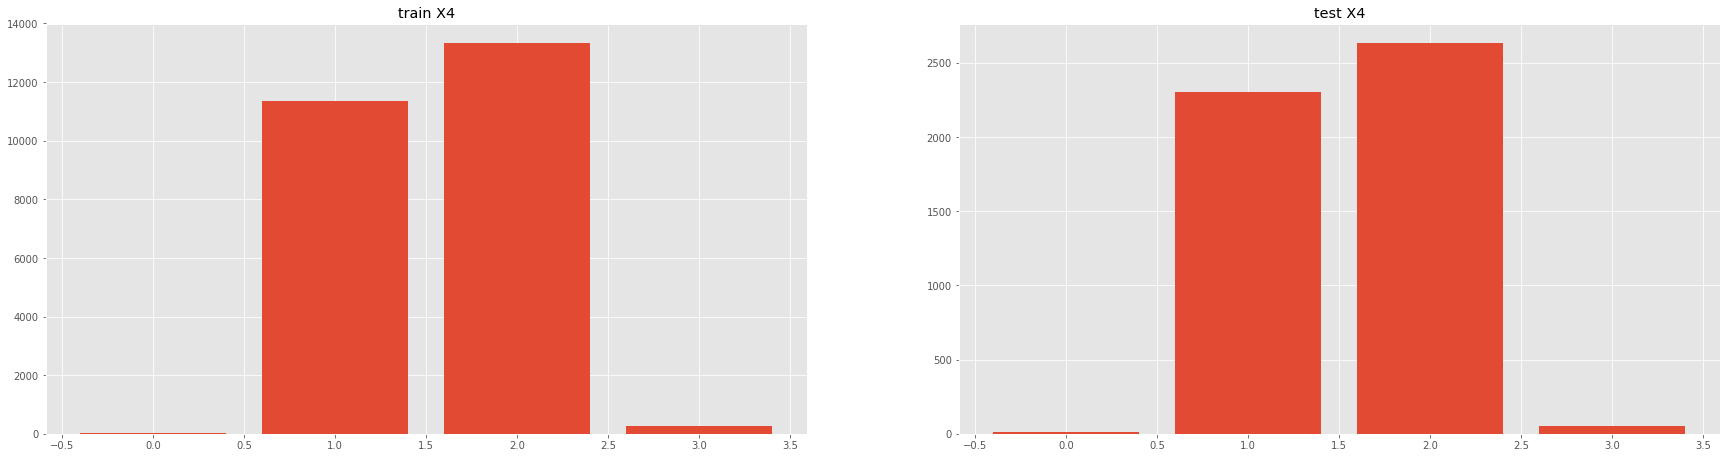

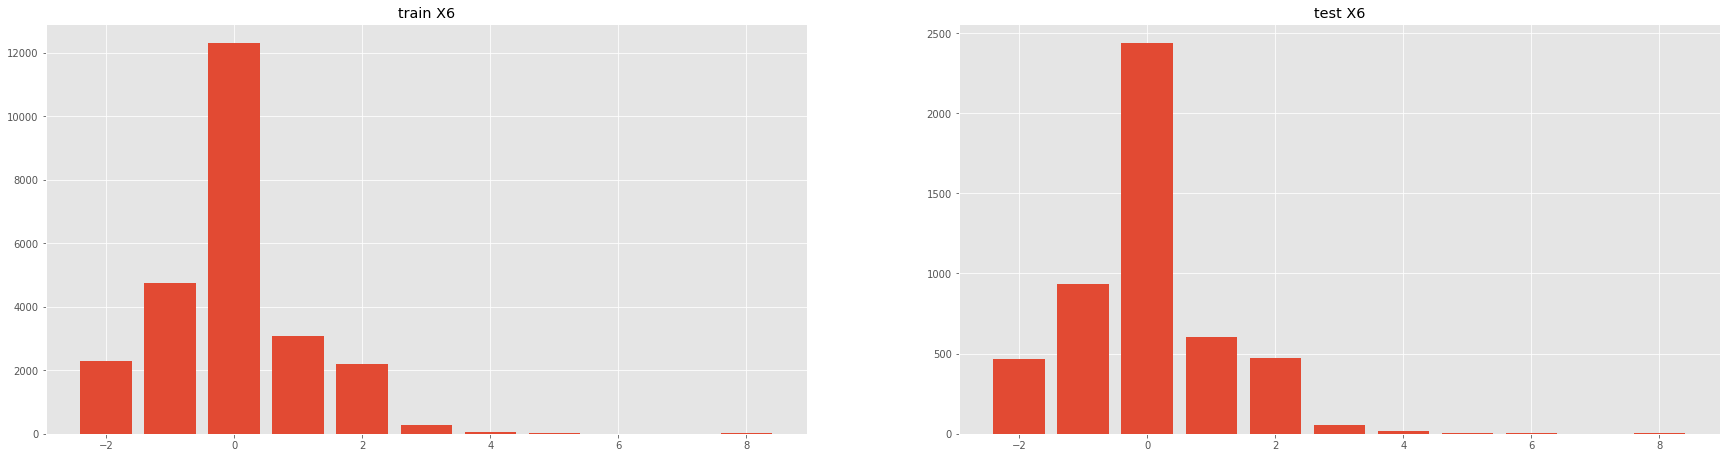

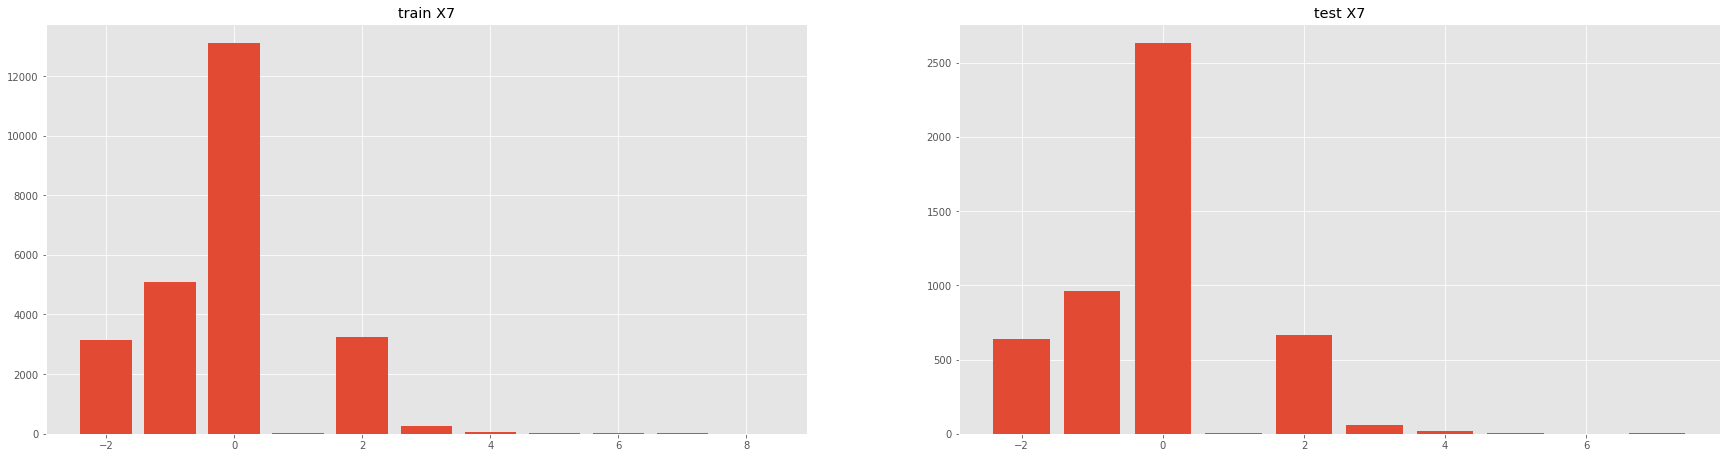

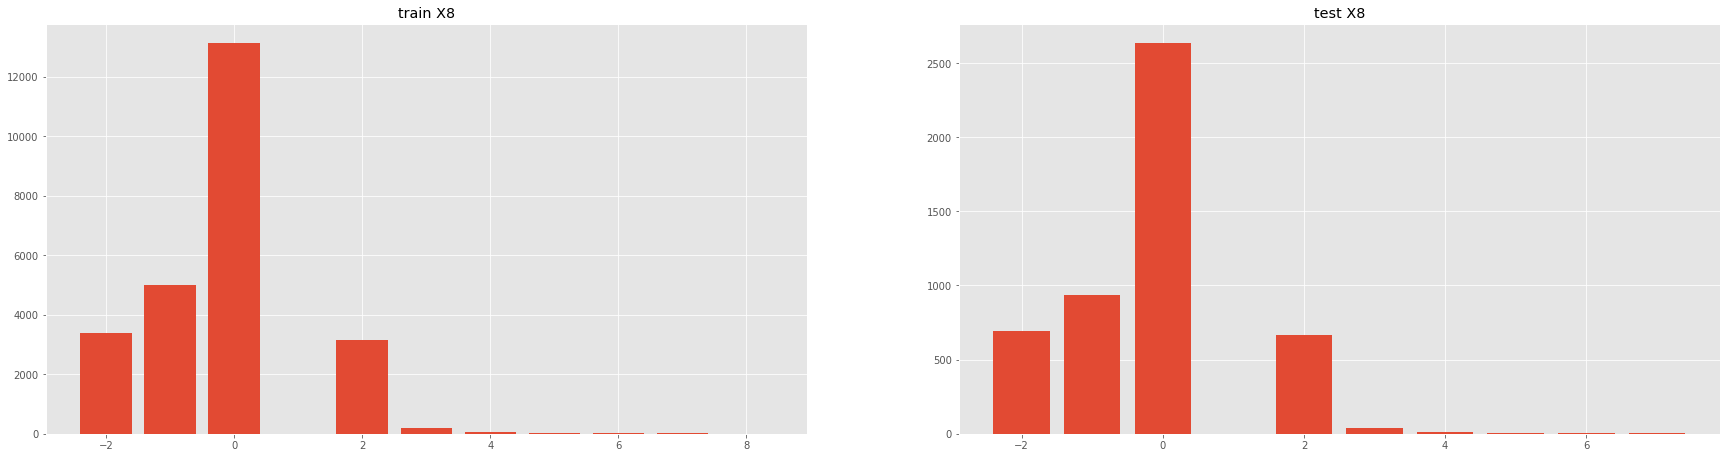

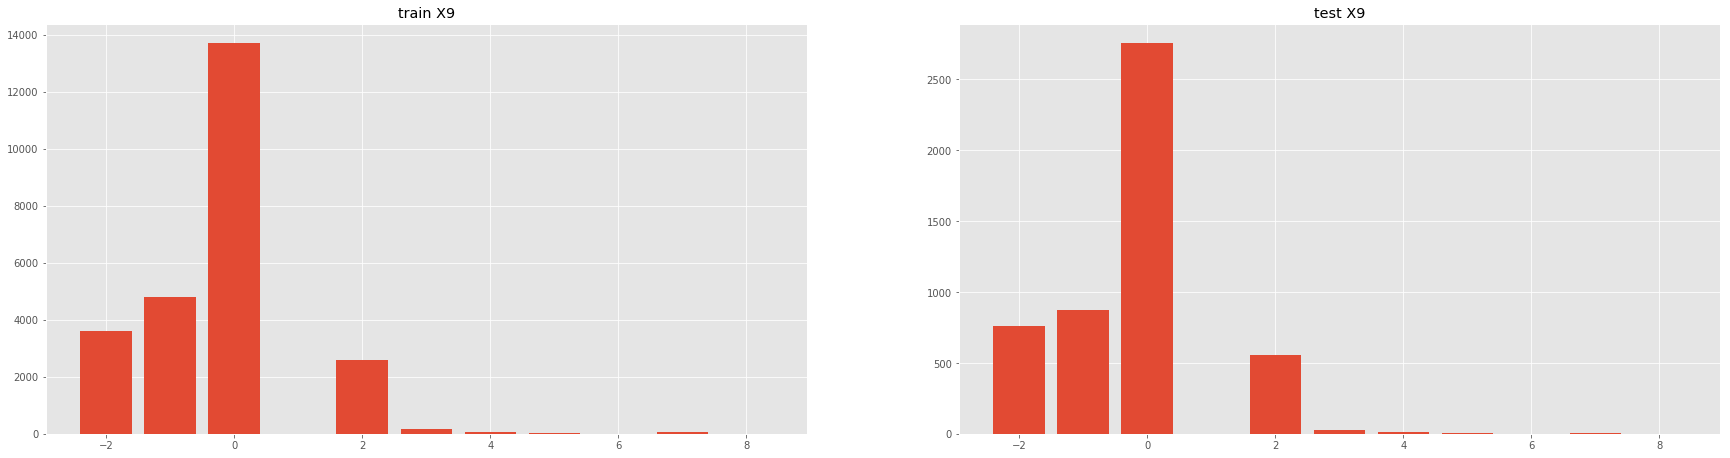

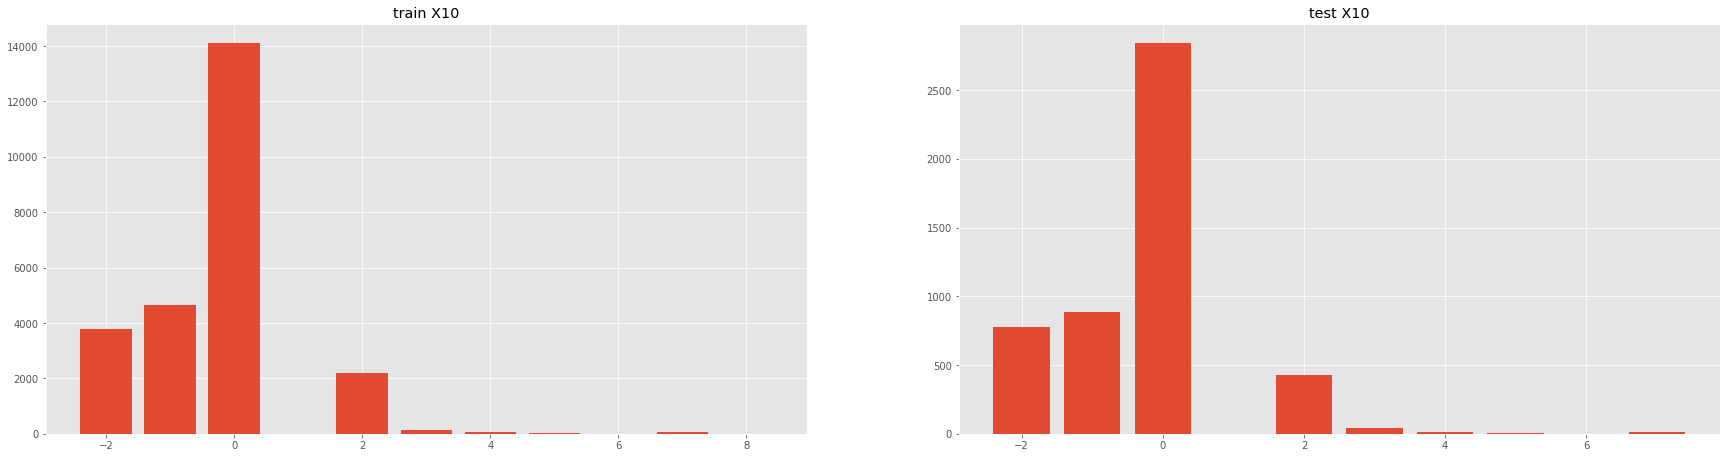

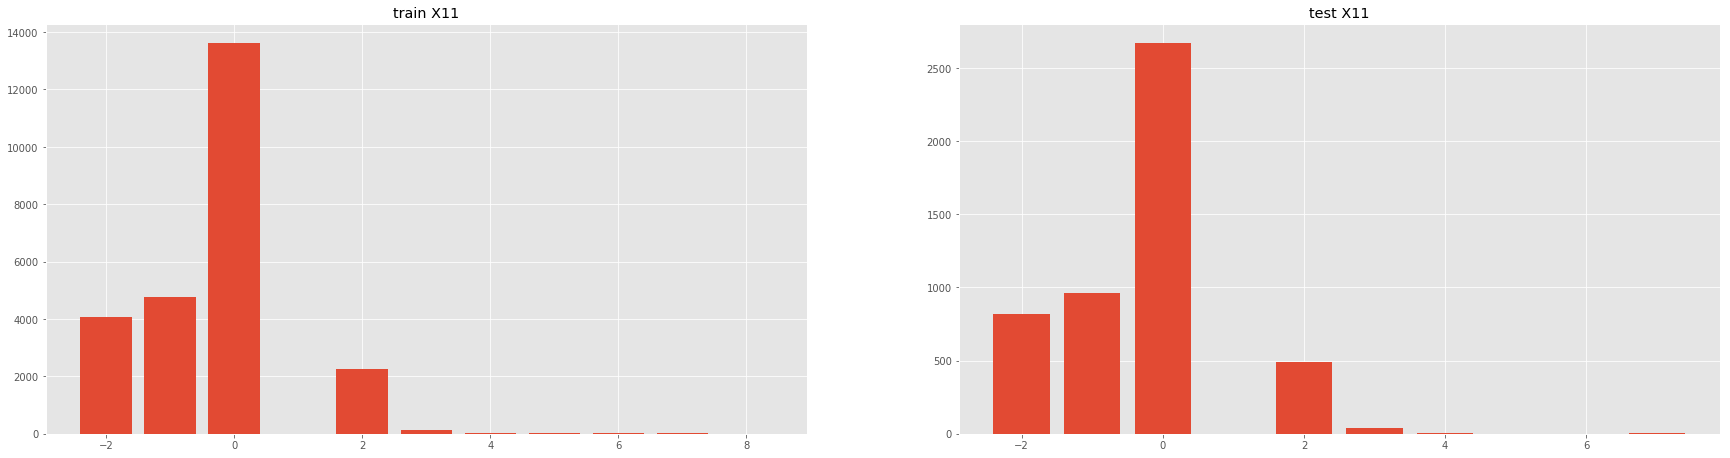

In [22]:
count=1
for i in range(len(cat_v)):
    fig = plt.figure(figsize=(30,80))
    plt.subplot(len(cat_v),2,count)
    plt.bar(train[cat_v[i]].value_counts().index, train[cat_v[i]].value_counts().values)
    plt.title("train "+cat_v[i])
    
    plt.subplot(len(cat_v),2,count+1)
    plt.bar(test[cat_v[i]].value_counts().index, test[cat_v[i]].value_counts().values)
    plt.title("test "+cat_v[i])
    count+=2

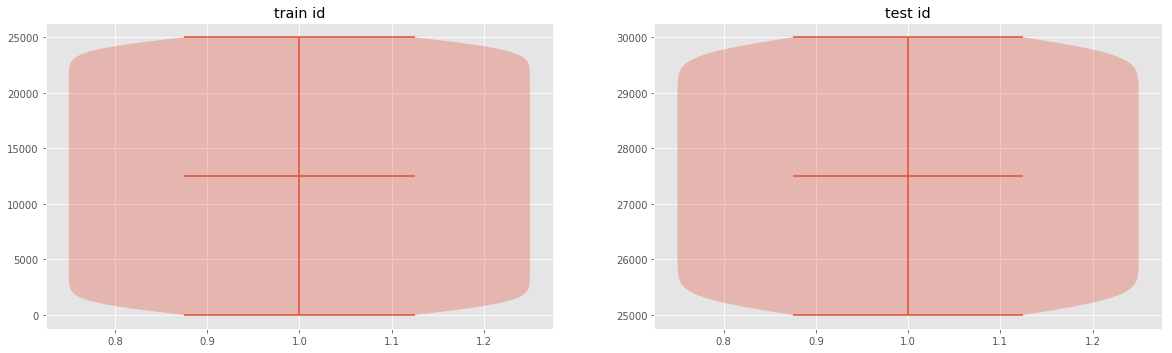

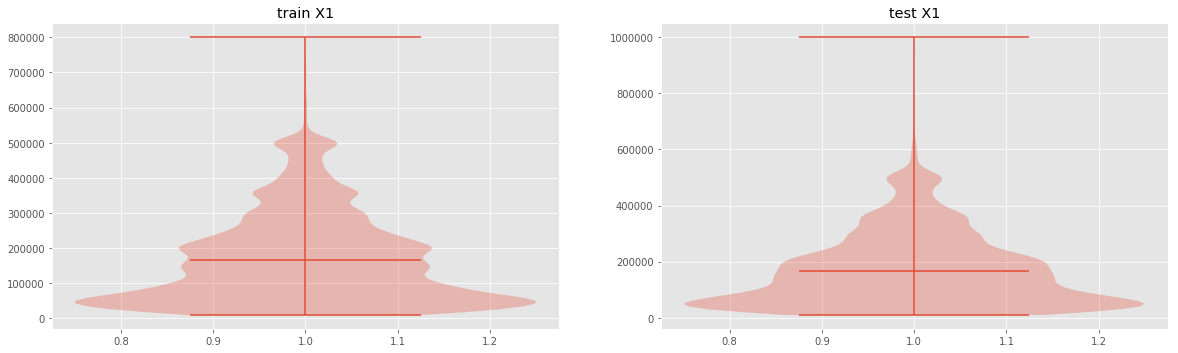

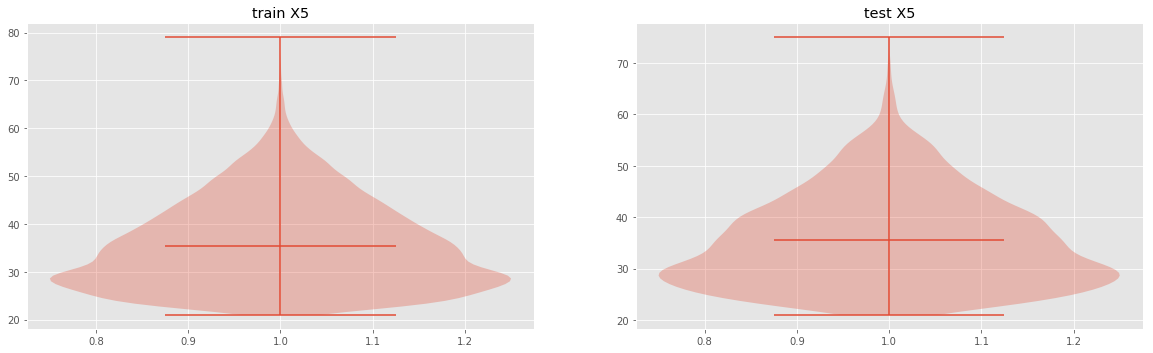

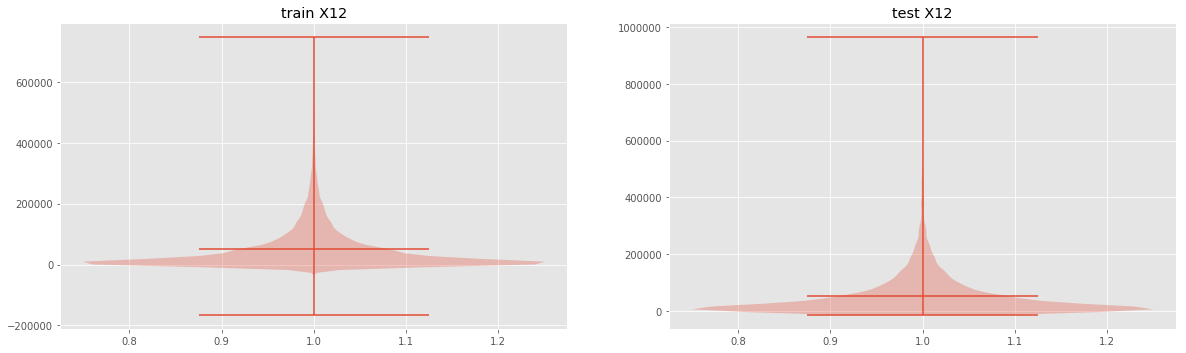

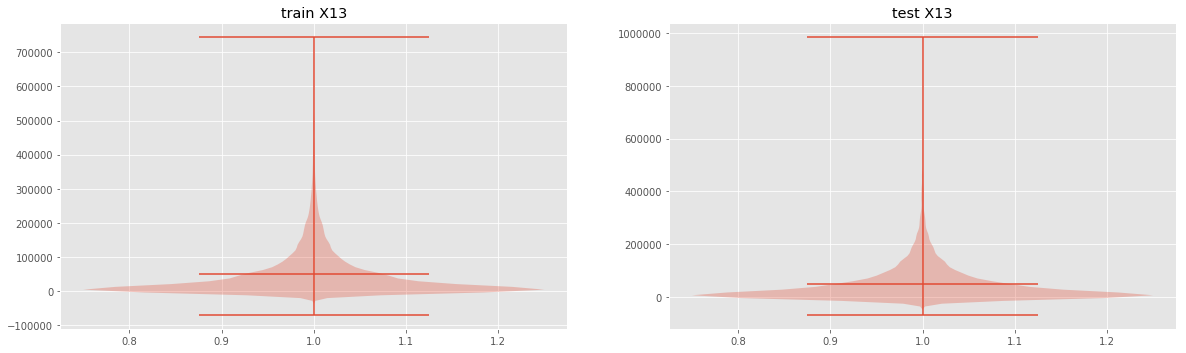

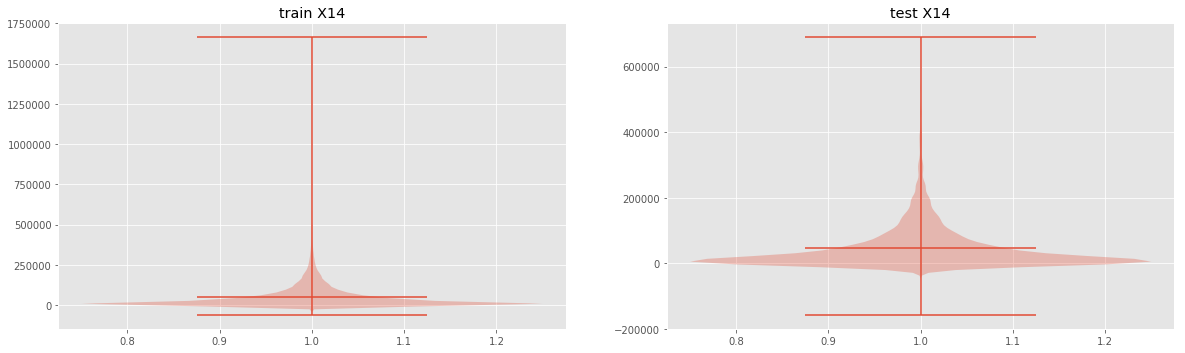

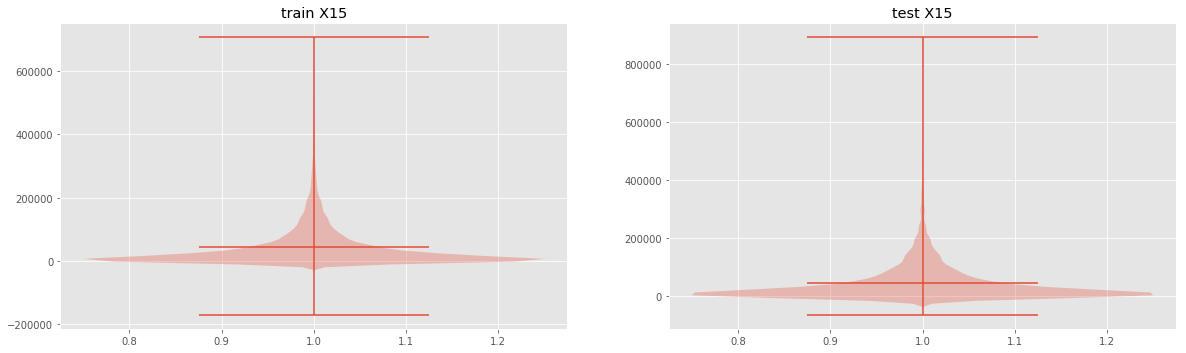

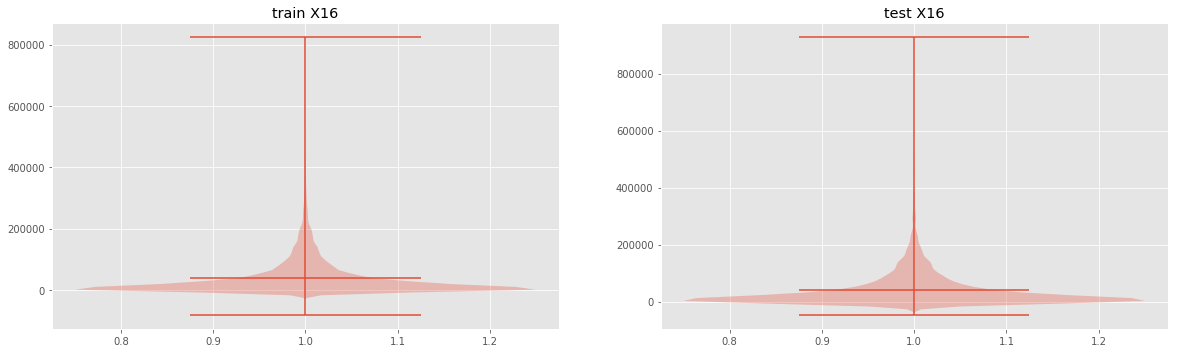

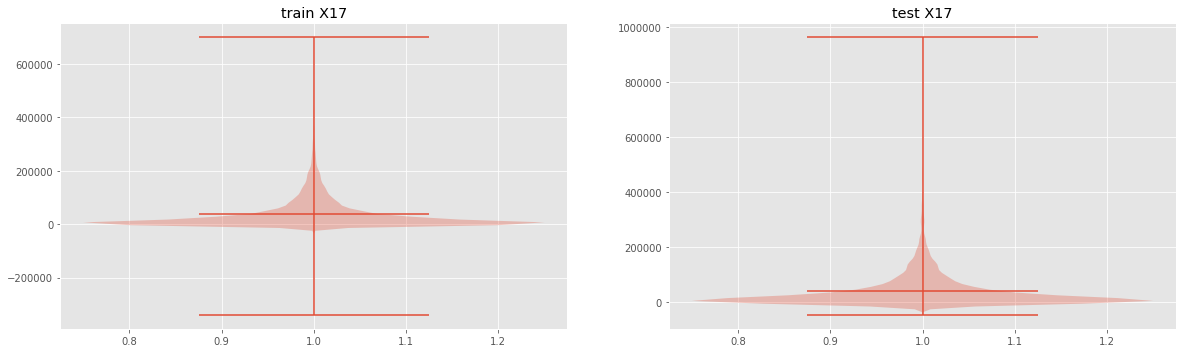

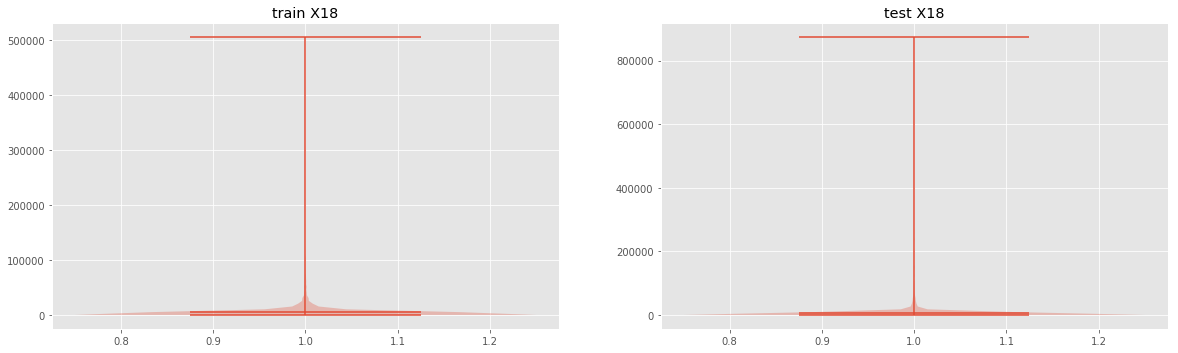

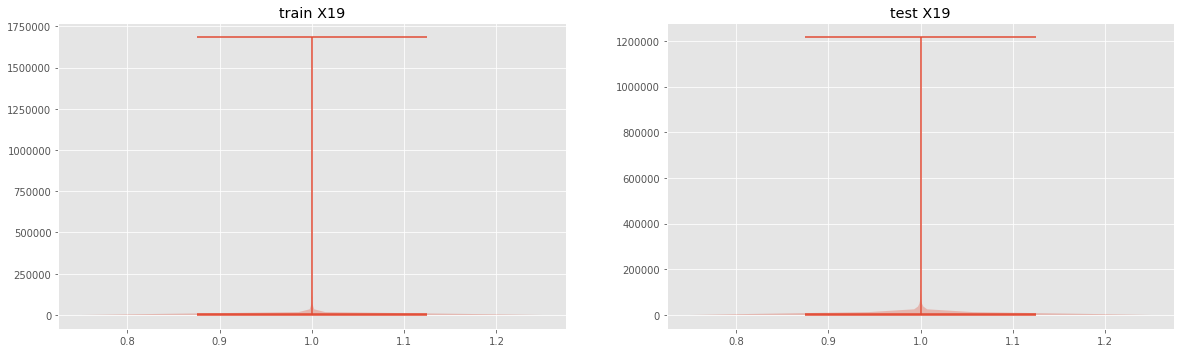

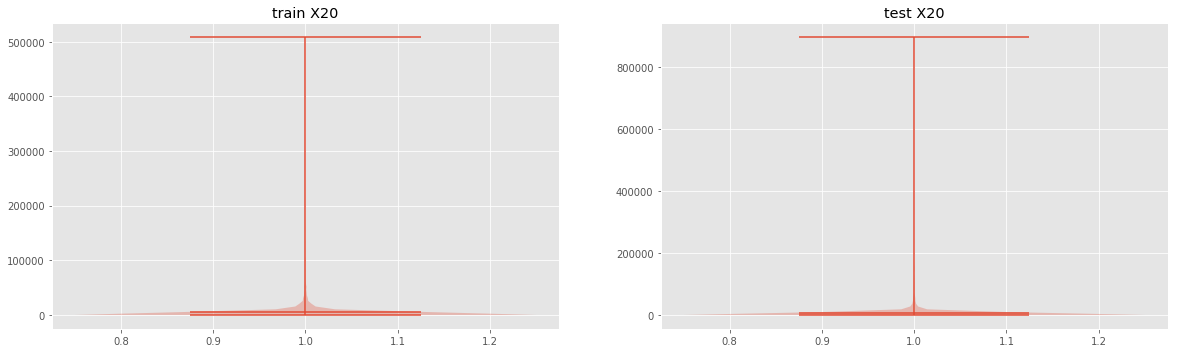

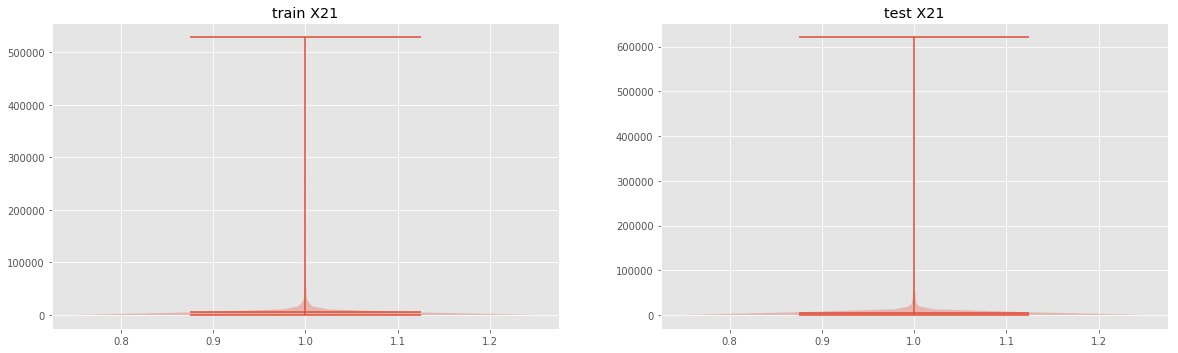

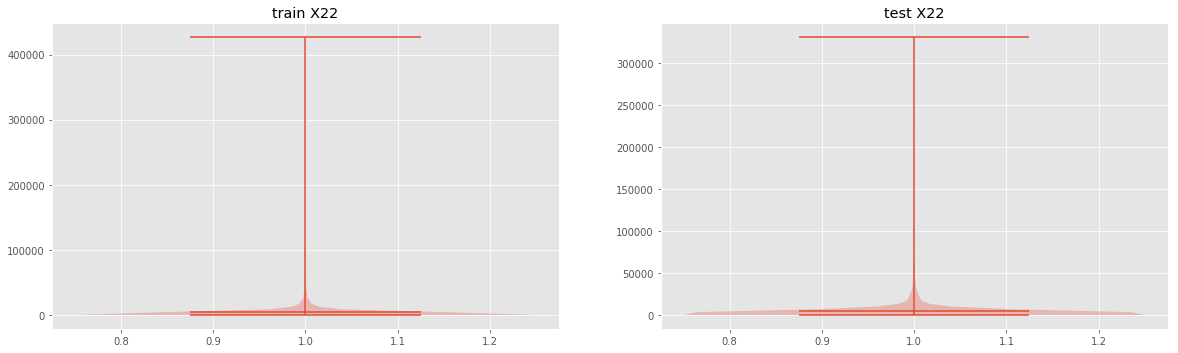

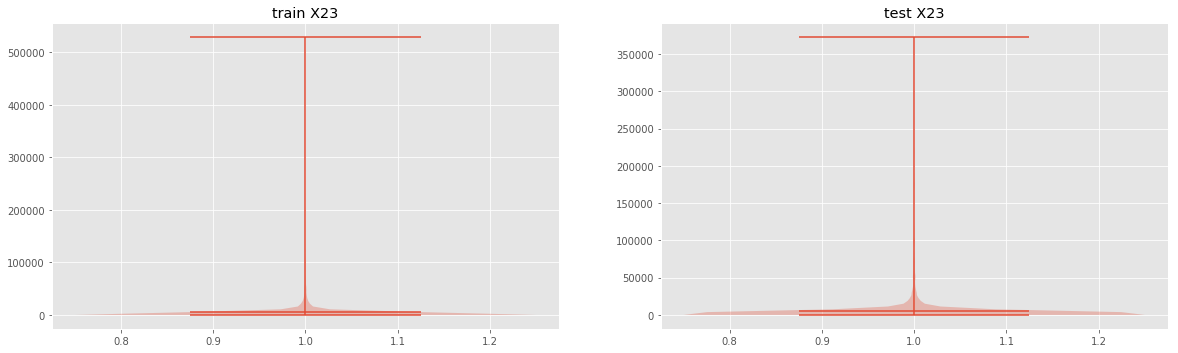

In [23]:
count=1
for i in range(len(con_v)):
    fig = plt.figure(figsize=(20,100))
    plt.subplot(len(con_v),2,count)
    plt.violinplot(train[con_v[i]],showmeans=True)
    plt.title("train "+con_v[i])
    
    plt.subplot(len(con_v),2,count+1)
    plt.violinplot(test[con_v[i]],showmeans=True)
    plt.title("test "+con_v[i])
    count+=2

# ii. Check the if there are linear relationships between features

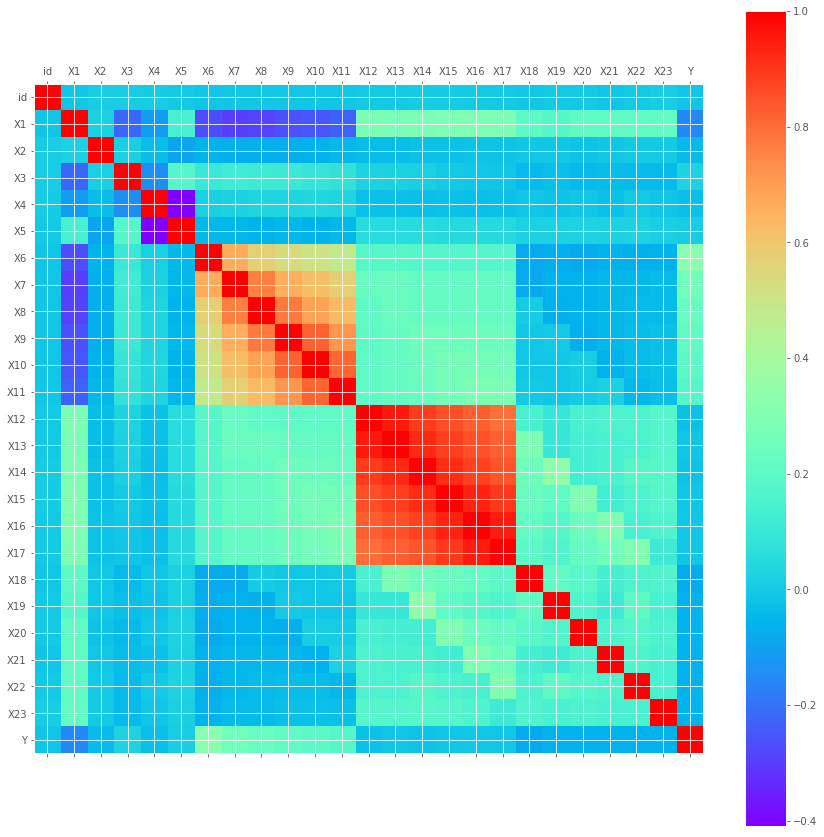

In [24]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
plot_corr(train)


# iii. Check pattern of the label

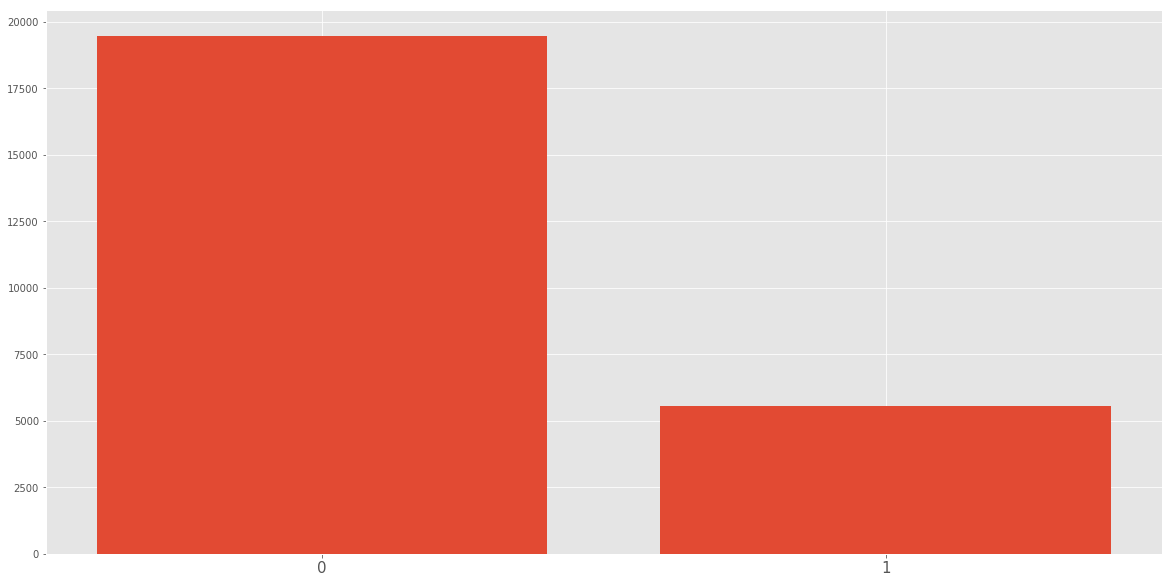

In [25]:
fig = plt.figure(figsize=(20,10))
plt.bar(train['Y'].value_counts().index, train['Y'].value_counts().values)
plt.xticks(train['Y'].value_counts().index,fontsize=15)
plt.show()

# **4. Build a baseline model**

In [26]:
from sklearn.model_selection import train_test_split
Y = train['Y']
X = train.drop(['Y', 'id'], axis= 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20000, 23) (5000, 23) (20000,) (5000,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RF = RandomForestClassifier(class_weight = {0:1, 1:3})
RF = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print (metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      3923
          1       0.61      0.30      0.40      1077

avg / total       0.78      0.81      0.78      5000



# **5. Basic parameter tuning: Grid Searching**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
def search_model(x_train, y_train, est, param_grid, n_jobs, cv):
    model = GridSearchCV(estimator  = est,
                                     param_grid = param_grid,
                                     scoring = 'f1_weighted',
                                     verbose = 10,
                                     n_jobs = n_jobs,
                                     iid = True,
                                     cv = cv)
    # Fit Grid Search Model
    model.fit(x_train, y_train)   
    return model

In [29]:
param_grid = {'n_estimators':[100,300,500],
             'criterion':['gini', 'entropy'],
             'class_weight': [{0:1, 1:3}]}

RF = search_model(X.values
            , Y.values
            , RandomForestClassifier()
            , param_grid
            , -1
            , 5)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  5.2min remaining:   34.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.1min finished


In [30]:
print("Best score: %0.3f" % RF.best_score_)
print("Best parameters set:", RF.best_params_)
print("Scores:", RF.grid_scores_) 

Best score: 0.794
Best parameters set: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}
Scores: [mean: 0.79171, std: 0.00537, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 100}, mean: 0.79044, std: 0.00496, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 300}, mean: 0.79189, std: 0.00462, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'n_estimators': 500}, mean: 0.79323, std: 0.00461, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 100}, mean: 0.79360, std: 0.00501, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 300}, mean: 0.79388, std: 0.00433, params: {'class_weight': {0: 1, 1: 3}, 'criterion': 'entropy', 'n_estimators': 500}]


# **6. Model Ensemble**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',class_weight = {0:1, 1:3})
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression (class_weight = {0:1, 1:3})
# results from gridsearch
eclf = VotingClassifier(estimators=[('Random_Forest',clf1), ('KNN', clf2),('Logistic', clf3)], voting='hard')
for clf, label in zip([clf1, clf2, clf3, eclf], ['Random_Forest', 'KNN','Logistic', 'Ensemble']):
    scores = cross_val_score(clf, X, Y, cv=3, scoring='f1_weighted')
    print ("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.79 (+/- 0.00) [Random_Forest]
Accuracy: 0.71 (+/- 0.00) [KNN]
Accuracy: 0.71 (+/- 0.03) [Logistic]
Accuracy: 0.78 (+/- 0.01) [Ensemble]


# **7. Generate the final submission**

In [32]:
eclf.fit(X, Y)
y = pd.DataFrame(eclf.predict(test.drop(['id'],axis=1)), columns=['y'])
predict_data = pd.concat([y, test['id']], axis =1)
predict_data.to_csv('Submmission.csv', index=False)

In [33]:
output = pd.read_csv('Submmission.csv')

In [34]:
output.head()

,y,id
0,0,25001
1,0,25002
2,0,25003
3,0,25004
4,0,25005


In [35]:
output.y.value_counts()

0    4189
1     811
Name: y, dtype: int64

<BarContainer object of 2 artists>

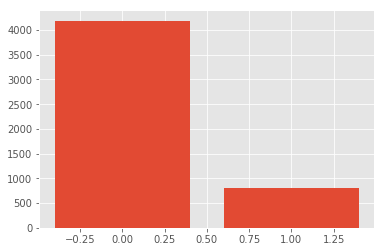

In [36]:
plt.bar(output.y.value_counts().index, output.y.value_counts().values)